<a href="https://colab.research.google.com/github/elhamnadimi/Company-assignment-_berlin/blob/main/company1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
data_1 = pd.read_csv("part_1.csv") 
data_2 = pd.read_csv("part_2.csv") 
data_3 = pd.read_csv("part_3.csv") 
data_4 = pd.read_csv("part_4.csv") 
data_5 = pd.read_csv("part_5.csv") 



In [ ]:
df_merged=pd.concat([data_1,data_2,data_3,data_4,data_5],ignore_index=True)
df_merged.to_csv('df_merged.csv') 


In [ ]:
#df_merged = pd.read_csv("df_merged.csv") 
df_merged.head(5)

,device_id,lat,lon,utc_timestamp
0,1,52.67649,13.31543,1609459727000
1,1,52.67649,13.31542,1609460036000
2,2,52.57837,13.58217,1609459241000
3,3,52.58373,13.33309,1609459502000
4,1,52.67650,13.31548,1609460387000


In [ ]:
df_merged.info

<bound method DataFrame.info of          device_id        lat        lon  utc_timestamp
0                1  52.676490  13.315430  1609459727000
1                1  52.676490  13.315420  1609460036000
2                2  52.578370  13.582170  1609459241000
3                3  52.583730  13.333090  1609459502000
4                1  52.676500  13.315480  1609460387000
...            ...        ...        ...            ...
4999995      10804  52.486620  13.313936  1609658914000
4999996      10821  52.586970  13.295290  1609717572000
4999997      10803  52.480453  13.427771  1609634161000
4999998      10817  52.568990  13.578130  1609681613000
4999999      10817  52.568990  13.578130  1609681193000

[5000000 rows x 4 columns]>

In [ ]:
pd.set_option('display.max_colwidth', -1)
stores = pd.read_csv("stores.csv")
stores.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,store_id,store_name,wkt
0,place_1,McDonald's,"POLYGON ((13.4611920000000005 52.4709870000000009, 13.4610299999999992 52.4706600000000023, 13.4611959999999993 52.4706290000000024, 13.4612090000000002 52.4706550000000007, 13.4613589999999999 52.4709560000000010, 13.4611920000000005 52.4709870000000009))"


In [ ]:
from itertools import takewhile


In [ ]:
#a. Resolve the user visits per store, i.e. filter the GPS signals through polygons.


def get_long_lat(s):
    it = iter(s[10:])  # Get the iterable of the string, not including the first 10 characters.
    long = ''.join(takewhile(lambda c: c.isnumeric() or c == '.', it))  # Take from the iterable as lomg as it's a part of a number. This we also take the next character after the number but won't include it in the output.
    lat = ''.join(takewhile(lambda c: c.isnumeric() or c == '.', it))  # Do it again.
    return long, lat


In [ ]:
get_long_lat('POLYGON ((13.4611920000000005 52.4709870000000009, 13.4610299999999992 52.4706600000000023, 13.4611959999999993 52.4706290000000024, 13.4612090000000002 52.4706550000000007, 13.4613589999999999 52.4709560000000010, 13.4611920000000005 52.4709870000000009))')

('13.4611920000000005', '52.4709870000000009')

In [ ]:
stores[['lon', 'lat']] = pd.DataFrame(stores['wkt'].apply(get_long_lat).tolist())
stores.head(1)

,store_id,store_name,wkt,lon,lat
0,place_1,McDonald's,"POLYGON ((13.4611920000000005 52.4709870000000009, 13.4610299999999992 52.4706600000000023, 13.4611959999999993 52.4706290000000024, 13.4612090000000002 52.4706550000000007, 13.4613589999999999 52.4709560000000010, 13.4611920000000005 52.4709870000000009))",13.4611920000000005,52.4709870000000009


In [ ]:
b1 = pd.read_csv("addidas")
b2 = pd.read_csv("apple")
b3 = pd.read_csv("bmw")
b4 = pd.read_csv("female")
b5 = pd.read_csv("male")
b6 = pd.read_csv("employed")
b7 = pd.read_csv("h_&_m")
b8 = pd.read_csv("honda")
b9 = pd.read_csv("job_seeking")
b10 = pd.read_csv("low_income")
b11 = pd.read_csv("mercedes-benz")
b12 = pd.read_csv("middle_income")
b13 = pd.read_csv("retired")
b14 = pd.read_csv("student")
b15 = pd.read_csv("tommy_helfinger")


In [ ]:
b = pd.concat([b1, b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15], axis=1)
b.columns = ['addidas', 'apple','bmw',
             'female','male','employed','h_&_m','honda','job_seeking','low_income',
             'mercedes-benz','middle_income','retired','student','tommy_helfinger']
#b.fillna(0.0)
b=b.replace(np.nan,0)

In [ ]:
b.tail(4)

,addidas,apple,bmw,female,male,employed,h_&_m,honda,job_seeking,low_income,mercedes-benz,middle_income,retired,student,tommy_helfinger
104644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174408,0.0,0.0,0.0
104645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174411,0.0,0.0,0.0
104646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174412,0.0,0.0,0.0
104647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174413,0.0,0.0,0.0


In [ ]:
b['row'] = b.index
b.head(2)

,addidas,apple,bmw,female,male,employed,h_&_m,honda,job_seeking,low_income,mercedes-benz,middle_income,retired,student,tommy_helfinger,row
0,90618.0,58923.0,160780.0,85001.0,1.0,128202.0,125654.0,161033.0,64710.0,5.0,76363.0,2,10686.0,128893.0,125804.0,0
1,97745.0,141158.0,78690.0,85002.0,2.0,72506.0,31465.0,169431.0,161402.0,10.0,133934.0,3,168131.0,96358.0,54252.0,1


In [ ]:
new_data=pd.merge(df_merged, b, left_on='device_id', right_on='row', how='left').drop('row', axis=1)
new_data.head()



,device_id,lat,lon,utc_timestamp,addidas,apple,bmw,female,male,employed,h_&_m,honda,job_seeking,low_income,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,1,52.67649,13.31543,1609459727000,97745.0,141158.0,78690.0,85002.0,2.0,72506.0,31465.0,169431.0,161402.0,10.0,133934.0,3,168131.0,96358.0,54252.0
1,1,52.67649,13.31542,1609460036000,97745.0,141158.0,78690.0,85002.0,2.0,72506.0,31465.0,169431.0,161402.0,10.0,133934.0,3,168131.0,96358.0,54252.0
2,2,52.57837,13.58217,1609459241000,45843.0,164532.0,114955.0,85003.0,3.0,76600.0,170616.0,92534.0,17976.0,15.0,47673.0,6,156201.0,112405.0,64445.0
3,3,52.58373,13.33309,1609459502000,164807.0,88589.0,129177.0,85004.0,4.0,116724.0,34023.0,166431.0,6752.0,20.0,120911.0,7,44238.0,74973.0,49837.0
4,1,52.67650,13.31548,1609460387000,97745.0,141158.0,78690.0,85002.0,2.0,72506.0,31465.0,169431.0,161402.0,10.0,133934.0,3,168131.0,96358.0,54252.0


In [ ]:
stores['lat'] = stores.lat.astype(float)
new_data['lat'] = new_data.lat.astype(float)
stores['lon'] = stores.lon.astype(float)
new_data['lon'] = new_data.lon.astype(float)

In [ ]:
stores["lat"]= round(stores.lat,2)
stores["lon"]= round(stores.lon,2)
stores.head(1)

,store_id,store_name,wkt,lon,lat
0,place_1,McDonald's,"POLYGON ((13.4611920000000005 52.4709870000000009, 13.4610299999999992 52.4706600000000023, 13.4611959999999993 52.4706290000000024, 13.4612090000000002 52.4706550000000007, 13.4613589999999999 52.4709560000000010, 13.4611920000000005 52.4709870000000009))",13.46,52.47


In [ ]:
new_data["lat"]= round(new_data.lat,2)
new_data["lon"]= round(new_data.lon,2)


In [ ]:
#convert to the real time from milisecond.
new_data["time"] = pd.to_datetime(new_data.utc_timestamp, unit='ms')
new_data.head(2)

,device_id,lat,lon,utc_timestamp,addidas,apple,bmw,female,male,employed,h_&_m,honda,job_seeking,low_income,mercedes-benz,middle_income,retired,student,tommy_helfinger,time
0,1,52.68,13.32,1609459727000,97745.0,141158.0,78690.0,85002.0,2.0,72506.0,31465.0,169431.0,161402.0,10.0,133934.0,3,168131.0,96358.0,54252.0,2021-01-01 00:08:47
1,1,52.68,13.32,1609460036000,97745.0,141158.0,78690.0,85002.0,2.0,72506.0,31465.0,169431.0,161402.0,10.0,133934.0,3,168131.0,96358.0,54252.0,2021-01-01 00:13:56


In [ ]:
df3 = new_data.merge(stores, how = 'inner', on = ['lat', 'lon'])


In [ ]:
#new_data.to_csv('new_data.csv') 
df3.drop(['wkt','utc_timestamp'], inplace=True, axis=1)
df3.head(5)


,device_id,lat,lon,addidas,apple,bmw,female,male,employed,h_&_m,honda,job_seeking,low_income,mercedes-benz,middle_income,retired,student,tommy_helfinger,time,store_id,store_name
0,4,52.59,13.29,106524.0,140769.0,103507.0,85005.0,5.0,24898.0,83629.0,38117.0,137026.0,25.0,11361.0,8,79099.0,75080.0,21672.0,2021-01-01 00:31:01,place_66,Aldi
1,4,52.59,13.29,106524.0,140769.0,103507.0,85005.0,5.0,24898.0,83629.0,38117.0,137026.0,25.0,11361.0,8,79099.0,75080.0,21672.0,2021-01-01 14:40:15,place_66,Aldi
2,97,52.59,13.29,1490.0,51998.0,82144.0,85098.0,98.0,63975.0,94253.0,6737.0,15229.0,490.0,5321.0,163,45551.0,16635.0,91068.0,2021-01-01 20:10:55,place_66,Aldi
3,97,52.59,13.29,1490.0,51998.0,82144.0,85098.0,98.0,63975.0,94253.0,6737.0,15229.0,490.0,5321.0,163,45551.0,16635.0,91068.0,2021-01-01 18:37:39,place_66,Aldi
4,97,52.59,13.29,1490.0,51998.0,82144.0,85098.0,98.0,63975.0,94253.0,6737.0,15229.0,490.0,5321.0,163,45551.0,16635.0,91068.0,2021-01-01 19:10:52,place_66,Aldi


In [ ]:
from datetime import datetime,date
df3['time'] = pd.to_datetime(df3['time']).dt.date
df3.head(2)

,device_id,lat,lon,addidas,apple,bmw,female,male,employed,h_&_m,honda,job_seeking,low_income,mercedes-benz,middle_income,retired,student,tommy_helfinger,time,store_id,store_name
0,4,52.59,13.29,106524.0,140769.0,103507.0,85005.0,5.0,24898.0,83629.0,38117.0,137026.0,25.0,11361.0,8,79099.0,75080.0,21672.0,2021-01-01,place_66,Aldi
1,4,52.59,13.29,106524.0,140769.0,103507.0,85005.0,5.0,24898.0,83629.0,38117.0,137026.0,25.0,11361.0,8,79099.0,75080.0,21672.0,2021-01-01,place_66,Aldi


In [ ]:
#b. Group the resolved visits by date (yyyy-mm-dd), store_name, and store_id.

In [ ]:
grouped=df3.groupby(['time','store_name','store_id'])

for key,item in grouped:
  a_group = grouped.get_group(key)
  #print(a_group, "\n")

#if we activate print we can see the groupby  date (yyyy-mm-dd), store_name, and store_id.

In [ ]:
# c. For each store_id/store_name/date provide the following metric.
#i. A total number of GPS signals per place_id/date. 
#ii. A total number of unique visitors (i.e. device ids).
#iii. A total number of unique visitors belonging to each affinity group.

In [ ]:
#A total number of GPS signals per place_id/date. 
test = df3.groupby(['time','store_name','store_id']).size()
test

time        store_name  store_id 
2021-01-01  Aldi        place_101    2882
                        place_102    1616
                        place_103    2827
                        place_105    2108
                        place_106    3272
                                     ... 
2021-01-03  Rewe        place_211    1242
                        place_212    573 
            Sparkasse   place_246    404 
            Subway      place_52     958 
                        place_53     1501
Length: 628, dtype: int64

In [ ]:
#A total number of unique visitors (i.e. device ids).
df3['device_id'].nunique()

22005

In [ ]:
#A total number of unique visitors belonging to each affinity group.

col_uni_val={}
for i in df3.columns:
    col_uni_val[i] = len(df3[i].unique())
#Import pprint to display dic nicely:
import pprint
pprint.pprint(col_uni_val)

{'addidas': 2579,
 'apple': 4362,
 'bmw': 3682,
 'device_id': 22005,
 'employed': 3256,
 'female': 22005,
 'h_&_m': 2743,
 'honda': 5338,
 'job_seeking': 3754,
 'lat': 32,
 'lon': 47,
 'low_income': 12525,
 'male': 22005,
 'mercedes-benz': 3917,
 'middle_income': 22005,
 'retired': 2204,
 'store_id': 210,
 'store_name': 10,
 'student': 4775,
 'time': 3,
 'tommy_helfinger': 2326}


In [ ]:
)#a. Using a tool of your choice, visualize the trend of unique visits for all places.#

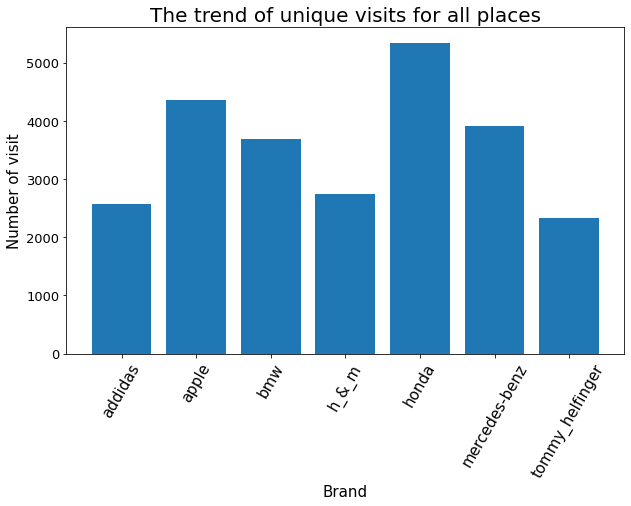

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

data = [2579,4362, 3682, 2743, 5338,3917,2326 ]
labels = ['addidas', 'apple', 'bmw', 'h_&_m', 'honda','mercedes-benz','tommy_helfinger']
plt.xticks(range(len(data)), labels)
plt.xticks(size = 15)
plt.yticks(size = 13)
plt.xticks(rotation=60)
plt.xlabel('Brand',size=15)
plt.ylabel('Number of visit',size=15)
plt.title('The trend of unique visits for all places',size=20)
plt.bar(range(len(data)), data) 
plt.show()

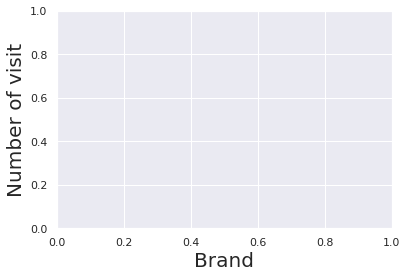

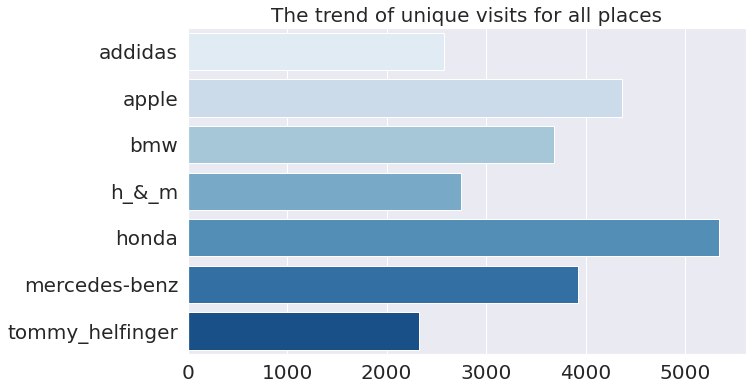

In [ ]:
#another way of ploting !

# Import matplotlib
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
data = [2579,4362, 3682, 2743, 5338,3917,2326 ]
labels = ['addidas', 'apple', 'bmw', 'h_&_m', 'honda','mercedes-benz','tommy_helfinger']
# Set dark grid
sns.set()

# Convert index of countries to series for plotting
y_vals = labels

# Select 'Confirmed' column as y-values
x_vals = data
plt.xlabel('Brand',size=20)
plt.ylabel('Number of visit',size=20)
# Set size of figure
plt.figure(figsize=(10,6))

# Create horizontal bar plot
sns.barplot(x=x_vals, y=y_vals, palette='Blues')
plt.xticks(size = 20)
plt.yticks(size = 20)

# Title plot
plt.title('The trend of unique visits for all places', size=20)

# Save figure
plt.savefig('The trend of unique visits for all places', dpi=300)

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

#installation
!pip install folium
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(stores)):
        lat = stores.iloc[i]['lat']
        long = stores.iloc[i]['lon']
        radius=5
        popup_text = """Users : {}<br>"""
        popup_text = popup_text.format(
                                   stores.iloc[i]['store_name'])
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

#show the map
world_map